In [ ]:
from google.colab import drive
from google.colab import output

!pip install qiskit
output.clear() #clear the cell output

In [ ]:
from qiskit import *

In [ ]:
#-------------------------------------------------------
# CIRCUIT FOR 1 STEP OF SQW ON A 8 NODES CICLIC GRAPH 
#-------------------------------------------------------
def szegedy(circuit):
    qr = circuit.qubits
    
    circuit.x([qr[4], qr[3]]) #for the negative controlled gates
    circuit.barrier()
    
    #L^4
    circuit.mct([qr[4],qr[3], qr[2]], qr[5],None, mode='advanced')
    circuit.ccx(qr[2], qr[3], qr[4])
    circuit.cx(qr[2], qr[3])
    circuit.barrier()

    circuit.x([qr[4], qr[3]]) #for the negative controlled gates
    circuit.barrier()
    
    #L^2
    circuit.x([qr[3]]) #for the negative controlled gates
    circuit.barrier()

    circuit.ccx(qr[2], qr[3], qr[4])
    circuit.cx(qr[2], qr[3])
    circuit.barrier()

    circuit.x([qr[3]]) #for the negative controlled gates
    circuit.barrier()
    
    #L
    circuit.cx(qr[2], qr[3])
    circuit.barrier()

    # multiple target negative controlled not
    circuit.x(qr[3])
    circuit.cx(qr[3], qr[4])
    circuit.x(qr[3])
    circuit.barrier()

    # multi controlled Z rotation
    circuit.h(qr[3])
    circuit.mcrz(180,[qr[4],qr[3]], qr[5])
    circuit.h(qr[3])

    circuit.barrier()

    # multiple target negative controlled not
    circuit.x(qr[3])
    circuit.cx(qr[3], qr[4])
    circuit.x(qr[3])
    circuit.barrier()

    #R^4
    circuit.mct([qr[4],qr[3], qr[2]], qr[5],None, mode='advanced')
    circuit.ccx(qr[2], qr[3], qr[4])
    circuit.cx(qr[2], qr[3])
    circuit.barrier()
    
    #R^2
    circuit.ccx(qr[2], qr[3], qr[4])
    circuit.cx(qr[2], qr[3])
    circuit.barrier()
    
    #R
    circuit.cx(qr[2], qr[3])
    circuit.barrier()

    # swap operator
    circuit.swap(qr[5], qr[2])
    circuit.swap(qr[4], qr[1])
    circuit.swap(qr[3], qr[0])

In [ ]:
#------------------------------
# EXPERIMENT
#------------------------------
qr = QuantumRegister(6)
cr = ClassicalRegister(3)

circuit = QuantumCircuit(qr, cr)

# state preparation for the Cyclic graph
circuit.h(qr[3])
circuit.cx(qr[3], qr[4])
circuit.x(qr[5])
circuit.barrier()

szegedy(circuit)

In [ ]:
!pip install pylatexenc
output.clear()

In [ ]:
circuit.draw()

░       ░                 ░       ░       ░            ░ »
q21_0: ───────────░───────░─────────────────░───────░───────░────────────░─»
                  ░       ░                 ░       ░       ░            ░ »
q21_1: ───────────░───────░─────────────────░───────░───────░────────────░─»
                  ░       ░                 ░       ░       ░            ░ »
q21_2: ───────────░───────░───■────■────■───░───────░───────░───■────■───░─»
       ┌───┐      ░ ┌───┐ ░   │    │  ┌─┴─┐ ░ ┌───┐ ░ ┌───┐ ░   │  ┌─┴─┐ ░ »
q21_3: ┤ H ├──■───░─┤ X ├─░───■────■──┤ X ├─░─┤ X ├─░─┤ X ├─░───■──┤ X ├─░─»
       └───┘┌─┴─┐ ░ ├───┤ ░   │  ┌─┴─┐└───┘ ░ ├───┤ ░ └───┘ ░ ┌─┴─┐└───┘ ░ »
q21_4: ─────┤ X ├─░─┤ X ├─░───■──┤ X ├──────░─┤ X ├─░───────░─┤ X ├──────░─»
       ┌───┐└───┘ ░ └───┘ ░ ┌─┴─┐└───┘      ░ └───┘ ░       ░ └───┘      ░ »
q21_5: ┤ X ├──────░───────░─┤ X ├───────────░───────░───────░────────────░─»
       └───┘      ░       ░ └───┘           ░       ░       ░            ░ »
 c1: 3/════════════════════════════════════════════════════════════════════»
                                                                           »
«             ░       ░                 ░                          »
«q21_0: ──────░───────░─────────────────░──────────────────────────»
«             ░       ░                 ░                          »
«q21_1: ──────░───────░─────────────────░──────────────────────────»
«             ░       ░                 ░                          »
«q21_2: ──────░───■───░─────────────────░──────────────────────────»
«       ┌───┐ ░ ┌─┴─┐ ░ ┌───┐     ┌───┐ ░ ┌───┐                    »
«q21_3: ┤ X ├─░─┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ H ├───────■─────────■──»
«       └───┘ ░ └───┘ ░ └───┘┌─┴─┐└───┘ ░ └───┘       │       ┌─┴─┐»
«q21_4: ──────░───────░──────┤ X ├──────░─────────────┼───────┤ X ├»
«             ░       ░      └───┘      ░      ┌──────┴──────┐└───┘»
«q21_5: ──────░───────░─────────────────░──────┤ U(0,0,90,0) ├─────»
«             ░       ░                 ░      └─────────────┘     »
« c1: 3/═══════════════════════════════════════════════════════════»
«                                                                  »
«                                            ░                 ░           »
«q21_0: ─────────────────────────────────────░─────────────────░───────────»
«                                            ░                 ░           »
«q21_1: ─────────────────────────────────────░─────────────────░───────────»
«                                            ░                 ░           »
«q21_2: ─────────────────────────────────────░─────────────────░───■────■──»
«                                 ┌───┐      ░ ┌───┐     ┌───┐ ░   │    │  »
«q21_3: ──────────────────■───────┤ H ├──────░─┤ X ├──■──┤ X ├─░───■────■──»
«                       ┌─┴─┐     └───┘      ░ └───┘┌─┴─┐└───┘ ░   │  ┌─┴─┐»
«q21_4: ───────■────────┤ X ├───────■────────░──────┤ X ├──────░───■──┤ X ├»
«       ┌──────┴───────┐└───┘┌──────┴──────┐ ░      └───┘      ░ ┌─┴─┐└───┘»
«q21_5: ┤ U(0,-90,0,0) ├─────┤ U(0,0,90,0) ├─░─────────────────░─┤ X ├─────»
«       └──────────────┘     └─────────────┘ ░                 ░ └───┘     »
« c1: 3/═══════════════════════════════════════════════════════════════════»
«                                                                          »
«             ░            ░       ░          
«q21_0: ──────░────────────░───────░────────X─
«             ░            ░       ░        │ 
«q21_1: ──────░────────────░───────░─────X──┼─
«             ░            ░       ░     │  │ 
«q21_2: ──■───░───■────■───░───■───░──X──┼──┼─
«       ┌─┴─┐ ░   │  ┌─┴─┐ ░ ┌─┴─┐ ░  │  │  │ 
«q21_3: ┤ X ├─░───■──┤ X ├─░─┤ X ├─░──┼──┼──X─
«       └───┘ ░ ┌─┴─┐└───┘ ░ └───┘ ░  │  │    
«q21_4: ──────░─┤ X ├──────░───────░──┼──X────
«             ░ └───┘      ░       ░  │       
«q21_5: ──────░────────────░───────░──X───────
«             ░            ░       ░          
« c1: 3/══════════════════════════════════════
«

In [ ]:
circuit.measure([qr[2], qr[1], qr[0]], cr)

#simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result_simulation = execute(circuit, simulator).result()

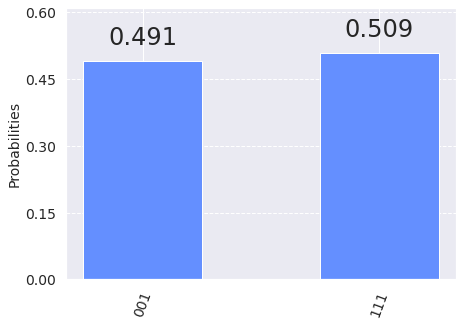

In [ ]:
# show results
from qiskit.tools.visualization import plot_histogram, plot_circuit_layout
plot_histogram(result_simulation.get_counts(circuit))

In [ ]:
from qiskit import IBMQ

ACCOUNT_API_STRING = ''
PROVIDER = 'ibm-q'
BACKEND = 'ibmq_16_melbourne'


IBMQ.save_account(ACCOUNT_API_STRING)
IBMQ.load_account()
provider = IBMQ.get_provider(PROVIDER)
qcomp = provider.get_backend(BACKEND)

configrc.store_credentials:WARNING:2021-03-09 09:49:44,448: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-03-09 09:49:44,723: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
from qiskit.tools.monitor import job_monitor

job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


In [ ]:
result = job.result()

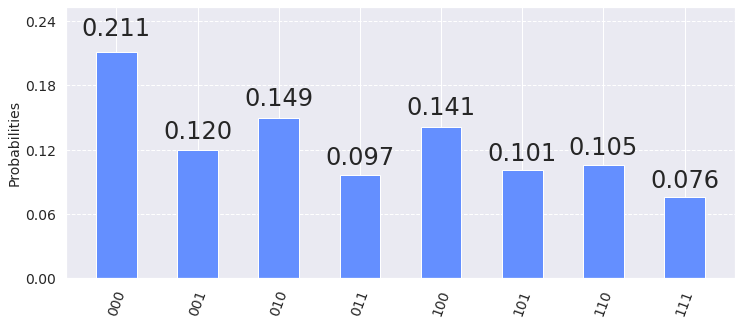

In [ ]:
plot_histogram(result.get_counts(circuit), figsize=(12, 5))

In [ ]:
#------------------------------
# RESULTS CHART
#------------------------------
import pandas as pd
from time import strftime, gmtime

rsim = result_simulation.get_counts()
real = result.get_counts()

SHOTS = 1024
labels = ['000', '001', '010', '011', '100', '101', '110', '111']

rsim_dict = {}
real_dict = {}
for l in labels:
  rsim_dict[l] = rsim.get(l) / SHOTS if l in rsim.keys() else 0
  real_dict[l] = real.get(l) / SHOTS if l in real.keys() else 0

rsim_df = pd.DataFrame.from_dict(rsim_dict.items())
real_df = pd.DataFrame.from_dict(real_dict.items())

# assign different labels
rsim_df.columns = ['label', 'prob_simulation']
real_df.columns = ['label', 'prob_real']

# join simul and real result on labels
results = pd.merge(rsim_df, real_df, on='label')

timestamp = strftime("%d-%m-%Y-%H:%M:%S", gmtime())
results.to_csv("SQW-experiment-{}.csv".format(timestamp))
results

,label,prob_simulation,prob_real
0,000,0.000000,0.210938
1,001,0.491211,0.120117
2,010,0.000000,0.149414
3,011,0.000000,0.096680
4,100,0.000000,0.140625
5,101,0.000000,0.100586
6,110,0.000000,0.105469
7,111,0.508789,0.076172


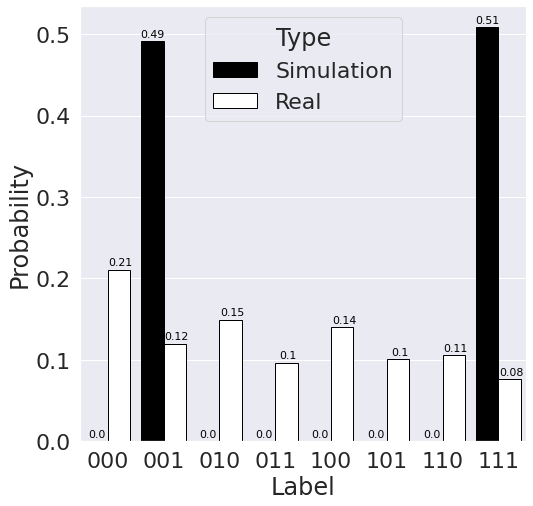

In [ ]:
#------------------------------
# COMPARISON REAL AND SIM
#------------------------------
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(font_scale=2)  
sns.color_palette("cubehelix", as_cmap=True)
plt.figure(figsize=(8, 8)) # width and height in inches

df = pd.DataFrame({
    'Label': list(results.label),
    'Simulation': list(results.prob_simulation),
    'Real': list(results.prob_real)
})

tidy = df.melt(id_vars='Label').rename(columns=str.title)
tidy.columns = ['Label', 'Type', 'Probability']
ax = sns.barplot(x='Label', y='Probability', hue='Type', data=tidy, palette=['black', 'white'], edgecolor='black')

for index, row in tidy.iterrows():
    if row.Type == 'Real': 
      ax.text(index - 7.77 ,row.Probability+0.005, round(row.Probability, 2), color='black', ha="center", fontsize=11)
    if row.Type == 'Simulation': 
      ax.text(index - 0.2, row.Probability+0.005, round(row.Probability, 2), color='black', ha="center", fontsize=11)

plt.savefig('results_SQW.png', format='png', transparent=True)